### Data Exploration of a publicly available dataset.

<img align="right" src="http://www.sharielf.com/gifs/zz032411pony.jpg" width="220px">

Data processing, cleaning and normalization is often 95% of the battle. Never underestimate this part of the process, if you're not careful about it your derrière will be sore later. Another good reason to spend a bit of time on understanding your data is that you may realize that the data isn't going to be useful for your task at hand. Quick pruning of fruitless branches is good.

#### Data as an analogy: Data is almost always a big pile of shit, the only real question is, "Is there a Pony inside?" and that's what data exploration and understanding is about. ####

For this exploration we're going to pull some data from the Malware Domain List website [http://www.malwaredomainlist.com](http://www.malwaredomainlist.com). We'd like to thank them for providing a great resourse and making their data available to the public. In general data is messy so even though we're going to be nit-picking quite a bit, we recognized that many datasets will have similar issues which is why we feel like this is a good 'real world' example of data.

* Full database: [ http://www.malwaredomainlist.com/mdlcsv.php](http://www.malwaredomainlist.com/mdlcsv.php)

In [1]:
# This exercise is mostly for us to understand what kind of data we have and then
# run some simple stats on the fields/values in the data. Pandas will be great for that
import pandas as pd
pd.__version__

'0.13.1'

In [2]:
# Set default figure sizes
pylab.rcParams['figure.figsize'] = (14.0, 5.0)

In [3]:
# This data url can be a web location http://foo.bar.com/mydata.csv or it can be a
# a path to your disk where the data resides /full/path/to/data/mydata.csv
# Note: Be a good web citizen, download the data once and then specify a path to your local file :)
# For instance: > wget http://www.malwaredomainlist.com/mdlcsv.php -O mdl_data.csv
# data_url =  'http://www.malwaredomainlist.com/mdlcsv.php'
data_url = 'data/mdl_data.csv'

In [4]:
# Note: when the data was pulled it didn't have column names, so poking around
# on the website we found the column headers referenced so we're explicitly
# specifying them to the CSV reader:
#    date,domain,ip,reverse,description,registrant,asn,inactive,country
dataframe = pd.read_csv(data_url, names=['date','domain','ip','reverse','description',
                        'registrant','asn','inactive','country'], header=None, error_bad_lines=False, low_memory=False)

In [5]:
dataframe.head(5)

,date,domain,ip,reverse,description,registrant,asn,inactive,country
0,2009/01/01_10:00,-,82.165.74.94,kundenserver.de,several compromised domains redirect to Mebroot,-,8560,1,1
1,2009/01/01_10:00,saudieng.net,63.245.196.12,-,compromised site/redirects to Mebroot,privacy protected,-,1,1
2,2009/01/01_10:00,thick-click.com,74.52.59.66,gator126.hostgator.com.,compromised site/redirects to Mebroot,Alvin slap30_1@juno.com,21844,1,1
3,2009/01/01_10:00,webfo.biz/fxid1.txt,69.89.27.211,box211.bluehost.com,RFI,Anthony Stebbing stebbing@omen-designs.com,11798,1,1
4,2009/01/01_10:00,www.xtipp.hu/index.php_,195.70.48.68,s5.mediacenter.hu,compromised site/redirects to Mebroot,Wolf Center Kft,8358,1,1


In [6]:
dataframe.tail(5)

,date,domain,ip,reverse,description,registrant,asn,inactive,country
88009,2014/05/09_15:10,assurances-immobilier.com/111,213.186.33.4,cluster003.ovh.net.,Trojan.Zeus.GameOver,Valette Frederic / yany.valette@wanadoo.fr,16276,0,0
88010,2014/05/02_06:37,www.adesse-anwaltskanzlei.de/kunde729/,81.169.222.233,h2288326.stratoserver.net.,exploit kit,hostmaster@one.com,6724,0,0
88011,2014/05/02_06:42,thibautoskian.com/redesigns/quartet,82.165.211.214,kundenserver.de.,Zbot trojan,Registrar Abuse Contact abuse@1and1.com,8560,0,0
88012,2014/05/01_00:23,antiviru.ru/download?midlet_id=3253&midlet_nam...,91.202.63.75,-,Android.Trojan,-,44571,0,0
88013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# We can see there's a blank row at the end that got filled with NaNs 
# Thankfully Pandas is great about handling missing data.
print dataframe.shape
dataframe = dataframe.dropna()
dataframe.shape

(88014, 9)


(87734, 9)

In [8]:
# For this use case we're going to remove any rows that have a '-' in the data 
# by replacing '-' with NaN and then running dropna() again
dataframe = dataframe.replace('-', np.nan)
dataframe = dataframe.dropna()
dataframe.shape

(31424, 9)

In [9]:
# Drilling down into one of the columns
dataframe['description']

2     compromised site/redirects to Mebroot
3                                       RFI
4     compromised site/redirects to Mebroot
5                 Backdoor.Win32.KeyStart.m
6                          exploits/mebroot
7                        Mebroot calls home
9                        Mebroot calls home
10                                 exploits
13                                    Rogue
16                                    Rogue
17                    redirects to exploits
18                                    Rogue
19                                    Rogue
23                                    Rogue
24                    redirects to exploits
...
87992    Trojan.Zeus.GameOver
87993    Trojan.Zeus.GameOver
87994    Trojan.Zeus.GameOver
87996    Trojan.Zeus.GameOver
87997    Trojan.Zeus.GameOver
87999    Trojan.Zeus.GameOver
88001    Trojan.Zeus.GameOver
88004    Trojan.Zeus.GameOver
88005    Trojan.Zeus.GameOver
88006    Trojan.Zeus.GameOver
88007    Trojan.Zeus.GameOver
88008 

In [10]:
# Pandas has a describe method
# For numerical data it give a nice set of summary statistics
# For categorical data it simply gives count, unique values
# and the most common value
dataframe['description'].describe()

count      31424
unique      1583
top       trojan
freq        3418
Name: description, dtype: object

In [11]:
# We can get a count of all the unique values by running value_counts()
dataframe['description'].value_counts()

trojan                   3418
RFI                      1599
zeus v1 config file      1319
Blackhole exploit kit    1077
zeus v2 config file       973
redirects to exploits     909
zeus v1 trojan            898
zeus v1 drop zone         681
fake av                   661
trojan Banker             613
zeus v2 drop zone         593
zeus v2 trojan            587
Fake Antivirus            533
RedKit exploit kit        532
directs to exploits       440
...
Fake AV scanner page                            1
backdoor Sheldoor                               1
fake av Advanced Defender                       1
redirects to Fragus exploit kit                 1
Connection.Intercept, Part of Banking trojan    1
Trojan.Artemis                                  1
Scam                                            1
FakePoliceAlert C&C                             1
Android.Adware.Plankton.A                       1
redirects to fake av'                           1
downloader                                    

In [12]:
# We noticed that the description values just differ by whitespace or captilization
dataframe['description'] = dataframe['description'].map(lambda x: x.strip().lower())
dataframe['description']

2     compromised site/redirects to mebroot
3                                       rfi
4     compromised site/redirects to mebroot
5                 backdoor.win32.keystart.m
6                          exploits/mebroot
7                        mebroot calls home
9                        mebroot calls home
10                                 exploits
13                                    rogue
16                                    rogue
17                    redirects to exploits
18                                    rogue
19                                    rogue
23                                    rogue
24                    redirects to exploits
...
87992    trojan.zeus.gameover
87993    trojan.zeus.gameover
87994    trojan.zeus.gameover
87996    trojan.zeus.gameover
87997    trojan.zeus.gameover
87999    trojan.zeus.gameover
88001    trojan.zeus.gameover
88004    trojan.zeus.gameover
88005    trojan.zeus.gameover
88006    trojan.zeus.gameover
88007    trojan.zeus.gameover
88008 

In [13]:
# First thing we noticed was that many of the 'submissions' had the exact same
# date, which we're guessing means some batch jobs just through a bunch of
# domains in and stamped them all with the same date.

# We also noticed that many values just differ by captilization (this is common)
dataframe = dataframe.applymap(lambda x: x.strip().lower() if not isinstance(x,float64) else x)
dataframe.head()

,date,domain,ip,reverse,description,registrant,asn,inactive,country
2,2009/01/01_10:00,thick-click.com,74.52.59.66,gator126.hostgator.com.,compromised site/redirects to mebroot,alvin slap30_1@juno.com,21844,1,1
3,2009/01/01_10:00,webfo.biz/fxid1.txt,69.89.27.211,box211.bluehost.com,rfi,anthony stebbing stebbing@omen-designs.com,11798,1,1
4,2009/01/01_10:00,www.xtipp.hu/index.php_,195.70.48.68,s5.mediacenter.hu,compromised site/redirects to mebroot,wolf center kft,8358,1,1
5,2009/01/02_00:00,epeiy.com/wssl713fro.exe,68.180.151.74,p2p.geo.vip.sp1.yahoo.com,backdoor.win32.keystart.m,epeiy@yahoo.com,36752,1,1
6,2009/01/03_00:00,har5launo.com/cgi-bin/index.cgi?dx,74.213.167.191,74-213-167-191.ultrahosting.com,exploits/mebroot,prokofyev yaroslav weksya@gmail.ru,23136,1,1


In [14]:
# The domain column looks to be full URI instead of just the domain
from urlparse import urlparse
dataframe['domain'] = dataframe['domain'].astype(str)
dataframe['domain'] = dataframe['domain'].apply(lambda x: "http://" + x)
dataframe['domain'] = dataframe['domain'].apply(lambda x: urlparse(x).netloc)

### Two columns that are a mistaken copy of each other?...
We also suspect that the 'inactive' column and the 'country' column are exactly the same, also why is there one row in the inactive column with a value of '2'?
<pre>
 "Ahhh, what an awful dream. Ones and zeroes everywhere... and I thought I saw a two [shudder]." 
      -- Bender
 "It was just a dream, Bender. There's no such thing as two". 
      -- Fry
</pre>

In [15]:
# Using numpy.corrcoef to compute the correlation coefficient matrix
np.corrcoef(dataframe["inactive"], dataframe["country"])

array([[ 1.,  1.],
       [ 1.,  1.]])

In [16]:
# Pandas also has a correlation method on it's dataframe which has nicer output
dataframe.corr()

,inactive,country
inactive,1,1
country,1,1


In [17]:
# Yeah perfectly correlated, so looks like 'country' 
# is just the 'inactive' column duplicated.
# So what happened here? Seems bizarre to have a replicated column.

#### Okay well lets try to get something out of this pile. We'd like to run some simple statistics to see what correlations the data might contain.

#### G-test is for goodness of fit to a distribution and for independence in contingency tables. It's related to chi-squared, multinomial and Fisher's exact test, please see http://en.wikipedia.org/wiki/G_test.


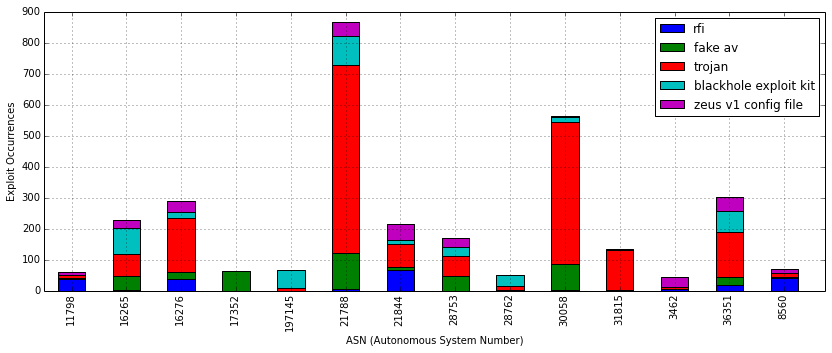

In [18]:
# The data hacking repository has a simple stats module we're going to use
import data_hacking.simple_stats as ss

# Spin up our g_test class
g_test = ss.GTest()

# Here we'd like to see how various exploits (description) are related to
# the ASN (Autonomous System Number) associated with the ip/domain.
(exploits, matches, cont_table) = g_test.highest_gtest_scores(
                                dataframe['description'], dataframe['asn'], N=5, matches=5)

ax = exploits.T.plot(kind='bar', stacked=True)
pylab.ylabel('Exploit Occurrences')
pylab.xlabel('ASN (Autonomous System Number)')
patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='upper right')


# The plot below is showing the number of times a particular exploit was associated with an ASN.
# Interesing to see whether exploits are highly correlated to particular ASNs.

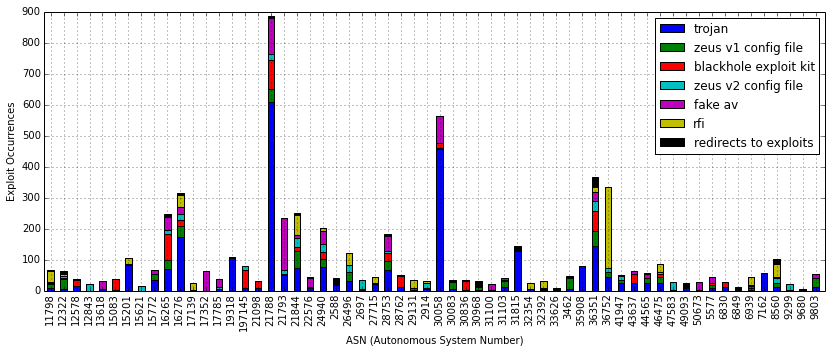

In [19]:
# Now we use g_test with the 'reverse=True' argument to display those exploits
# that do not have a high correlation with a particular ASN.
exploits, matches, cont_table = g_test.highest_gtest_scores(dataframe['description'], 
                                dataframe['asn'], N=7, reverse=True, min_volume=500, matches=15)
ax = exploits.T.plot(kind='bar', stacked=True)
pylab.ylabel('Exploit Occurrences')
pylab.xlabel('ASN (Autonomous System Number)')
patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='best')

# The plot below is showing exploits who aren't associated with any particular ASN.
# Interesing to see exploits that are spanning many ASNs.

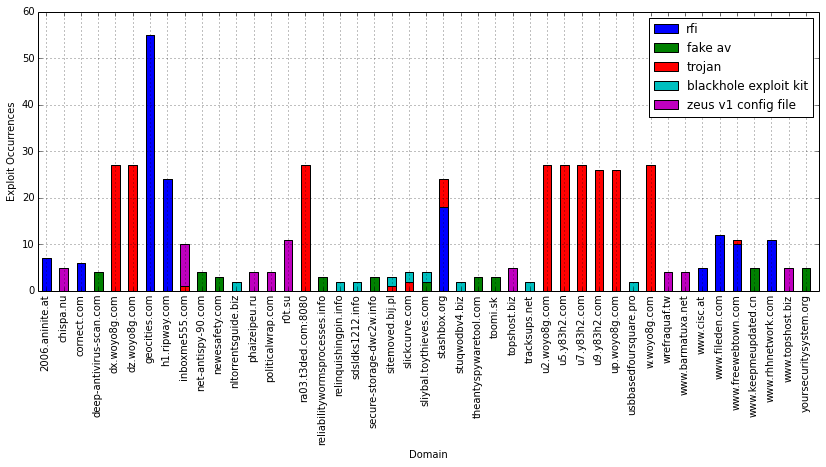

In [20]:
exploits, matches, cont_table = g_test.highest_gtest_scores(dataframe['description'], 
                                                            dataframe['domain'], N=5)
ax = exploits.T.plot(kind='bar', stacked=True) #, log=True)
pylab.ylabel('Exploit Occurrences')
pylab.xlabel('Domain')
patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='best')

# The Contingency Table below is just showing the counts of the number of times
# a particular exploit was associated with an TLD.

In [21]:
# Drilling down on one particular exploit
banker = dataframe[dataframe['description']=='trojan banker'] # Subset dataframe
exploits, matches, cont_table = g_test.highest_gtest_scores(banker['description'], banker['domain'], N=5)
import pprint
pprint.pprint(["Domain: %s  Count: %d" % (domain,count) for domain,count in exploits.iloc[0].iteritems()])

['Domain: avisosphp.com  Count: 6',
 'Domain: hidravale.sites.uol.com.br  Count: 6',
 'Domain: multprintx.dominiotemporario.com  Count: 6',
 'Domain: novickarodrigues.sites.uol.com.br  Count: 6',
 'Domain: ricolombard.sites.uol.com.br  Count: 7',
 'Domain: shopbrand.com.br  Count: 6',
 'Domain: transrealtt.sites.uol.com.br  Count: 5',
 'Domain: vxalves.sites.uol.com.br  Count: 5',
 'Domain: www.sarahbrightman.co.uk  Count: 5']


### So switching gears, perhaps we'll look at date range, volume over time, etc.

Pandas also has reasonably good functionality for date/range processing and plotting.

In [22]:
# Add the proper timestamps to the dataframe replacing the old ones
dataframe['date'] = dataframe['date'].apply(lambda x: str(x).replace('_','T'))
dataframe['date'] = pd.to_datetime(dataframe['date'])

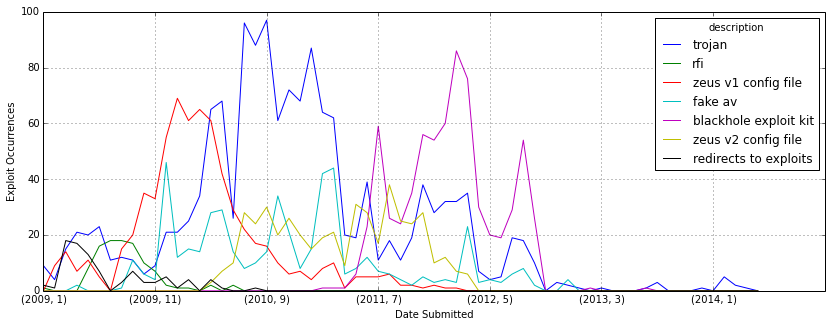

In [23]:
# Now prepare the data for plotting by pivoting on the 
# description to create a new column (series) for each value

# We're going to add a new column called value (needed for pivot). This
# is a bit dorky, but needed as the new columns that get created should
# really have a value in them, also we can use this as our value to sum over.
subset = dataframe[['date','description']]
subset['count'] = 1
pivot = pd.pivot_table(subset, values='count', rows=['date'], cols=['description'], fill_value=0)
by = lambda x: lambda y: getattr(y, x)
grouped = pivot.groupby([by('year'),by('month')]).sum()

# Only pull out the top 7 desciptions (exploit types)
topN = subset['description'].value_counts()[:7].index
grouped[topN].plot()
pylab.ylabel('Exploit Occurrences')
pylab.xlabel('Date Submitted')

# The plot below shows the volume of particular exploits impacting new domains.
# Tracking the ebb and flow of exploits over time might be useful
# depending on the type of analysis you're doing.

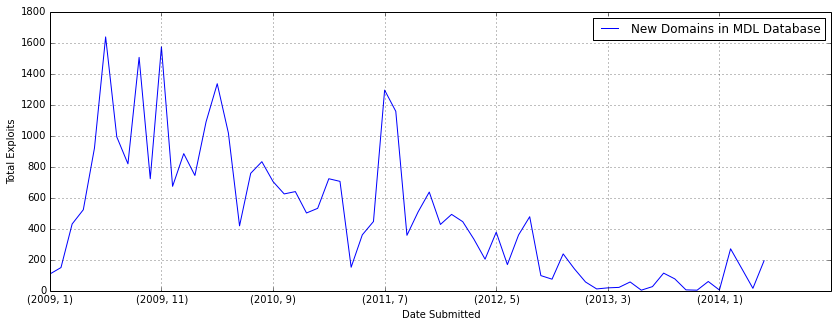

In [24]:
# The rise and fall of the different exploits is intriguing but
# the taper at the end is concerning, let look at total volume of
# new malicious domains coming into the MDL database.
total_mdl = dataframe['description']
total_mdl.index=dataframe['date']
total_agg = total_mdl.groupby([by('year'),by('month')]).count()
matplotlib.pyplot.figure()
total_agg.plot(label='New Domains in MDL Database')
pylab.ylabel('Total Exploits')
pylab.xlabel('Date Submitted')
matplotlib.pyplot.legend()

### That doesn't look good...
The plot above shows the total volume of ALL newly submitted domains. We see from the plot that the taper is a general overall effect due to a drop in new domain submissions into the MDL database. Given the recent anemic volume there might be another data source that has more active submissions.

Well the anemic volume issue aside we're going to carry on by looking at the correlations in volume over time. In other words are the volume of reported exploits closely related to the volume of other exploits...

### Correlations of Volume Over Time
<ul>
   <li>**Prof. Farnsworth:** Behold! The Deathclock!
   <li>**Leela:** Does it really work?
   <li>**Prof. Farnsworth:** Well, it's occasionally off by a few seconds, what with "free will" and all.
</ul>

In [25]:
# Only pull out the top 20 desciptions (exploit types)
topN = subset['description'].value_counts()[:20].index
corr_df = grouped[topN].corr()

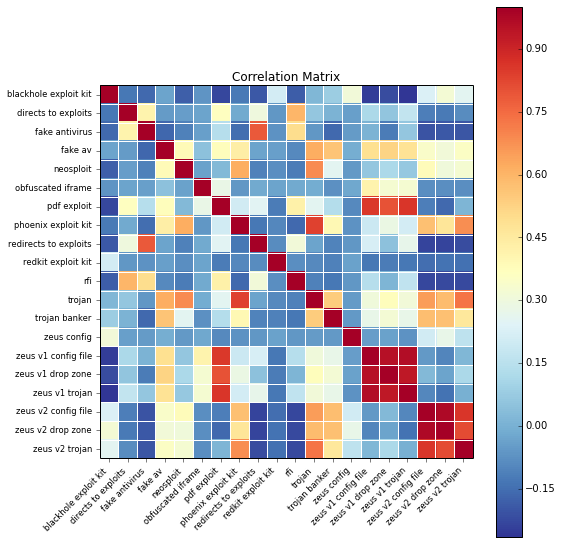

In [26]:
# Statsmodels has a correlation plot, we expect the diagonal to have perfect
# correlation (1.0) but anything high score off the diagonal means that
# the volume of different exploits are temporally correlated.
import statsmodels.api as sm
corr_df.sort(axis=0, inplace=True) # Just sorting so exploits names are easy to find
corr_df.sort(axis=1, inplace=True)
corr_matrix = corr_df.as_matrix()
pylab.rcParams['figure.figsize'] = (8.0, 8.0)
sm.graphics.plot_corr(corr_matrix, xnames=corr_df.index.tolist())
plt.show()

#### Discussion of Correlation Matrix
  * The two sets of 3x3 red blocks on the lower right make intuitive sense, Zeus config file, drop zone and trojan show almost perfect volume over time correlation.

description          zeus v1 trojan  zeus v1 config file  zeus v1 drop zone
description                                                                
zeus v1 trojan             1.000000             0.965172           0.931997
zeus v1 config file        0.965172             1.000000           0.952504
zeus v1 drop zone          0.931997             0.952504           1.000000

[3 rows x 3 columns]


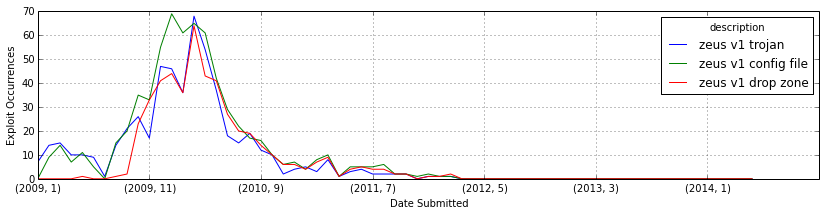

In [27]:
pylab.rcParams['figure.figsize'] = (14.0, 3.0)
print grouped[['zeus v1 trojan','zeus v1 config file','zeus v1 drop zone']].corr()
grouped[['zeus v1 trojan','zeus v1 config file','zeus v1 drop zone']].plot()
pylab.ylabel('Exploit Occurrences')
pylab.xlabel('Date Submitted')

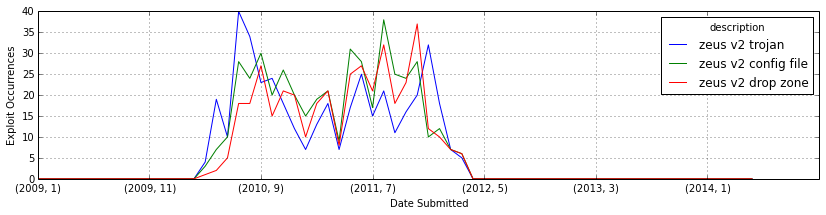

In [28]:
grouped[['zeus v2 trojan','zeus v2 config file','zeus v2 drop zone']].plot()
pylab.ylabel('Exploit Occurrences')
pylab.xlabel('Date Submitted')

description            trojan  phoenix exploit kit
description                                       
trojan               1.000000             0.835561
phoenix exploit kit  0.835561             1.000000

[2 rows x 2 columns]


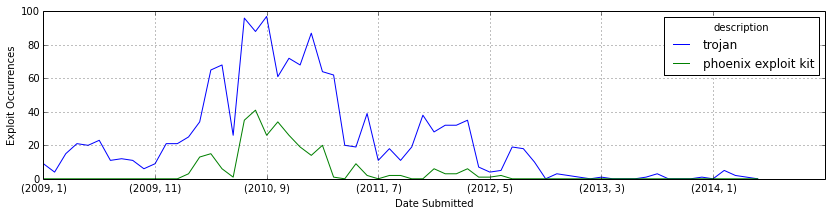

In [29]:
# Drilling down on the correlation between 'trojan' and 'phoenix exploit kit'
print grouped[['trojan','phoenix exploit kit']].corr()
grouped[['trojan','phoenix exploit kit']].plot()
pylab.ylabel('Exploit Occurrences')
pylab.xlabel('Date Submitted')

### Interesting? (shrug... maybe...)
Looking above we see that the generic 'trojan' label and the fairly specific 'phoenix exploit kit' have a reasonable volume over time correlation of .834 *(PearsonsR is the default for the corr() function; a score of 1.0 means perfectly correlated [Pearson's Correlation](http://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient))*. So it certainly might be something to dive into depending on your particular interest, again the win here is that with a few lines of python code we can 'see' these kinds of relationships.

### Conclusions
So this exercise was an exploration of the dataset. At this point we have a good idea about what's in the dataset, what cleanup issues we might have and the overall quality of the dataset. We've run some simple correlative statistics and produced some nice plots. Most importantly we should have a good feel for whether this dataset is going to suite our needs for whatever use case we may have.

In the next exercise we're going look at some syslog data. We'll take it up a notch by computing similarities with 'Banded MinHash', running a heirarchical clustering algorithm and exercising some popular supervised machine learning functionality from Scikit Learn http://scikit-learn.org/.